In [1]:
import xarray as xr
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats
from scipy.stats import ttest_ind
import geopandas as gpd
import rioxarray
from shapely.geometry import mapping
from shapely.geometry import Point
from shapely.geometry import shape
from shapely.geometry import box
import os
from glob import glob
import itertools
import cmaps
from scipy.stats.stats import pearsonr
import rasterio
import rioxarray

import cartopy.feature
from cartopy.mpl.patch import geos_to_path
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

os.chdir('/Users/zeqinhuang/Documents/paper/TB_SWE/processed_data')

In [2]:
TP_shp = gpd.read_file('/Users/zeqinhuang/Documents/dataset/Maps/Tibetan_Plateau/Tibetan_Plateau2.shp')

def add_panel_label(ax, label, x = 0, y = 1.15):
    ax.text(x, y, label, transform=ax.transAxes,
      fontsize=13, fontweight='normal', va='top', ha='left')

# plot the composite map of SWEI, STI, SPI, and GPH500 for El Nino and La Nina respectively

In [3]:
# plot the composite map of SWEI, STI, SPI, and GPH500 for El Nino and La Nina
SWEI_yearly_ERA5 = xr.open_dataarray('SWEI_yearly_ERA5.nc')
SPI3_yearly_ERA5 = xr.open_dataarray('ERA5_TP_spi3_yearly_1979_2023.nc')
STI3_yearly_ERA5 = xr.open_dataarray('ERA5_TP_sti3_yearly_1979_2023.nc')
GPH500_yearly_ERA5 = xr.open_dataarray('ERA5_TP_500z_JFM_yearly_1979_2023.nc')
u850_yearly_ERA5 = xr.open_dataarray('ERA5_TP_850u_JFM_yearly_1979_2023.nc')
v850_yearly_ERA5 = xr.open_dataarray('ERA5_TP_850v_JFM_yearly_1979_2023.nc')
tcc_yearly_ERA5 = xr.open_dataarray('ERA5_TP_tcc_JFM_yearly_1979_2023.nc')
ssrd_yearly_ERA5 = xr.open_dataarray('ERA5_TP_ssrd_JFM_yearly_1979_2023.nc')

GPH500_ano_yearly_ERA5 = GPH500_yearly_ERA5 - GPH500_yearly_ERA5.mean(dim='year')
u850_ano_yearly_ERA5 = u850_yearly_ERA5 - u850_yearly_ERA5.mean(dim='year')
v850_ano_yearly_ERA5 = v850_yearly_ERA5 - v850_yearly_ERA5.mean(dim='year')
tcc_ano_yearly_ERA5 = tcc_yearly_ERA5 - tcc_yearly_ERA5.mean(dim='year')
ssrd_ano_yearly_ERA5 = ssrd_yearly_ERA5 - ssrd_yearly_ERA5.mean(dim='year')

NINO3 = pd.read_csv('NINO3.csv', header=None)
NINO3 = NINO3[0].str.split(expand=True)
NINO3 = NINO3.set_index(0)
NINO3 = NINO3.loc['1979':'2022']
NINO3 = NINO3.astype(float)
NINO3 = NINO3.stack()
NINO3.index = pd.date_range(start='1979-01',end='2023-01', freq='M')
NINO3_QS = NINO3.resample('QS-DEC').mean()
NINO3_QS_DJF = NINO3_QS[NINO3_QS.index.month == 12]
NINO3_QS_DJF = NINO3_QS_DJF[1:]

elnino_year = NINO3_QS_DJF[NINO3_QS_DJF > 0.5].index.year
lanina_year = NINO3_QS_DJF[NINO3_QS_DJF < -0.5].index.year

SWEI_elnino = SWEI_yearly_ERA5.sel(year = elnino_year)
SWEI_lanina = SWEI_yearly_ERA5.sel(year = lanina_year)
SPI3_elnino = SPI3_yearly_ERA5.sel(time = SPI3_yearly_ERA5.time.dt.year.isin(elnino_year + 1)) # +1 for water year
SPI3_lanina = SPI3_yearly_ERA5.sel(time = SPI3_yearly_ERA5.time.dt.year.isin(lanina_year + 1))
STI3_elnino = STI3_yearly_ERA5.sel(time = STI3_yearly_ERA5.time.dt.year.isin(elnino_year + 1))
STI3_lanina = STI3_yearly_ERA5.sel(time = STI3_yearly_ERA5.time.dt.year.isin(lanina_year + 1))
GPH500_elnino = GPH500_ano_yearly_ERA5.sel(year = elnino_year + 1)
GPH500_lanina = GPH500_ano_yearly_ERA5.sel(year = lanina_year + 1)
u850_elnino = u850_ano_yearly_ERA5.sel(year = elnino_year + 1)
u850_lanina = u850_ano_yearly_ERA5.sel(year = lanina_year + 1)
v850_elnino = v850_ano_yearly_ERA5.sel(year = elnino_year + 1)
v850_lanina = v850_ano_yearly_ERA5.sel(year = lanina_year + 1)
tcc_elnino = tcc_ano_yearly_ERA5.sel(year = elnino_year + 1)
tcc_lanina = tcc_ano_yearly_ERA5.sel(year = lanina_year + 1)
ssrd_elnino = ssrd_ano_yearly_ERA5.sel(year = elnino_year + 1)
ssrd_lanina = ssrd_ano_yearly_ERA5.sel(year = lanina_year + 1)

SWEI_elnino = SWEI_elnino.mean(dim='year')
SWEI_lanina = SWEI_lanina.mean(dim='year')
SPI3_elnino = SPI3_elnino.mean(dim='time')
SPI3_lanina = SPI3_lanina.mean(dim='time')
STI3_elnino = STI3_elnino.mean(dim='time')
STI3_lanina = STI3_lanina.mean(dim='time')
GPH500_elnino = GPH500_elnino.mean(dim='year')
GPH500_lanina = GPH500_lanina.mean(dim='year')
u850_elnino = u850_elnino.mean(dim='year')
u850_lanina = u850_lanina.mean(dim='year')
v850_elnino = v850_elnino.mean(dim='year')
v850_lanina = v850_lanina.mean(dim='year')
tcc_elnino = tcc_elnino.mean(dim='year')
tcc_lanina = tcc_lanina.mean(dim='year')
ssrd_elnino = ssrd_elnino.mean(dim='year')
ssrd_lanina = ssrd_lanina.mean(dim='year')

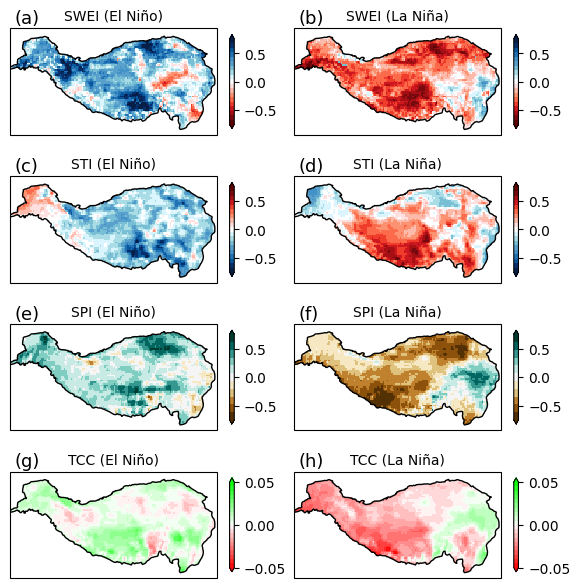

In [4]:
# create a 4 * 2 subplot, each column is for El Nino and La Nina, each row is for SWEI, STI, SPI, and tcc
fig, axs = plt.subplots(4, 2, figsize=(7, 7.5), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.1, wspace=0.1)
# plot SWEI
p = SWEI_elnino.plot(ax=axs[0, 0], cmap=cmaps.temp_diff_18lev_r, vmin=-0.75, vmax=0.75, add_colorbar=False, extend='both')
cbar = plt.colorbar(p, ax=axs[0, 0], orientation='vertical', pad=0.05, shrink=0.7, extend='both')
axs[0, 0].set_title('SWEI (El Niño)', fontsize=10)
TP_shp.boundary.plot(ax=axs[0, 0], edgecolor='black', linewidth=1)
axs[0, 0].set_extent([68, 105, 25, 41], crs=ccrs.PlateCarree())
add_panel_label(axs[0, 0], '(a)', x=0.02, y=1.18)
p = SWEI_lanina.plot(ax=axs[0, 1], cmap=cmaps.temp_diff_18lev_r, vmin=-0.75, vmax=0.75, add_colorbar=False, extend='both')
cbar = plt.colorbar(p, ax=axs[0, 1], orientation='vertical', pad=0.05, shrink=0.7, extend='both')
axs[0, 1].set_title('SWEI (La Niña)', fontsize=10)
TP_shp.boundary.plot(ax=axs[0, 1], edgecolor='black', linewidth=1)
axs[0, 1].set_extent([68, 105, 25, 41], crs=ccrs.PlateCarree())
add_panel_label(axs[0, 1], '(b)', x=0.02, y=1.18)

# plot STI
p = STI3_elnino.plot(ax=axs[1, 0], cmap=cmaps.temp_diff_18lev, vmin=-0.75, vmax=0.75, add_colorbar=False, extend='both')
cbar = plt.colorbar(p, ax=axs[1, 0], orientation='vertical', pad=0.05, shrink=0.7, extend='both')
axs[1, 0].set_title('STI (El Niño)', fontsize=10)
TP_shp.boundary.plot(ax=axs[1, 0], edgecolor='black', linewidth=1)
axs[1, 0].set_extent([68, 105, 25, 41], crs=ccrs.PlateCarree())
add_panel_label(axs[1, 0], '(c)', x=0.02, y=1.18)
p = STI3_lanina.plot(ax=axs[1, 1], cmap=cmaps.temp_diff_18lev, vmin=-0.75, vmax=0.75, add_colorbar=False, extend='both')
cbar = plt.colorbar(p, ax=axs[1, 1], orientation='vertical', pad=0.05, shrink=0.7, extend='both')
axs[1, 1].set_title('STI (La Niña)', fontsize=10)
TP_shp.boundary.plot(ax=axs[1, 1], edgecolor='black', linewidth=1)
axs[1, 1].set_extent([68, 105, 25, 41], crs=ccrs.PlateCarree())
add_panel_label(axs[1, 1], '(d)', x=0.02, y=1.18)

# plot SPI
p = SPI3_elnino.plot(ax=axs[2, 0], cmap=cmaps.CBR_drywet, vmin=-0.75, vmax=0.75, add_colorbar=False, extend='both')
cbar = plt.colorbar(p, ax=axs[2, 0], orientation='vertical', pad=0.05, shrink=0.7, extend='both')
axs[2, 0].set_title('SPI (El Niño)', fontsize=10)
TP_shp.boundary.plot(ax=axs[2, 0], edgecolor='black', linewidth=1)
axs[2, 0].set_extent([68, 105, 25, 41], crs=ccrs.PlateCarree())
add_panel_label(axs[2, 0], '(e)', x=0.02, y=1.18)
p = SPI3_lanina.plot(ax=axs[2, 1], cmap=cmaps.CBR_drywet, vmin=-0.75, vmax=0.75, add_colorbar=False, extend='both')
cbar = plt.colorbar(p, ax=axs[2, 1], orientation='vertical', pad=0.05, shrink=0.7, extend='both')
axs[2, 1].set_title('SPI (La Niña)', fontsize=10)
TP_shp.boundary.plot(ax=axs[2, 1], edgecolor='black', linewidth=1)
axs[2, 1].set_extent([68, 105, 25, 41], crs=ccrs.PlateCarree())
add_panel_label(axs[2, 1], '(f)', x=0.02, y=1.18)

# plot tcc
# mask tcc_el and tcc_la with TP_shp
tcc_elnino.rio.set_crs("epsg:4326")
tcc_elnino.rio.set_spatial_dims("lon", "lat", inplace=True)
tcc_elnino = tcc_elnino.rio.clip(TP_shp.geometry.apply(mapping), TP_shp.crs)

tcc_lanina.rio.set_crs("epsg:4326")
tcc_lanina.rio.set_spatial_dims("lon", "lat", inplace=True)
tcc_lanina = tcc_lanina.rio.clip(TP_shp.geometry.apply(mapping), TP_shp.crs)

p = tcc_elnino.plot(ax=axs[3, 0], cmap=cmaps.GMT_red2green, vmin=-0.05, vmax=0.05, add_colorbar=False, extend='both')
cbar = plt.colorbar(p, ax=axs[3, 0], orientation='vertical', pad=0.05, shrink=0.7, extend='both')
axs[3, 0].set_title('TCC (El Niño)', fontsize=10)
TP_shp.boundary.plot(ax=axs[3, 0], edgecolor='black', linewidth=1)
axs[3, 0].set_extent([68, 105, 25, 41], crs=ccrs.PlateCarree())
add_panel_label(axs[3, 0], '(g)', x=0.02, y=1.18)

p = tcc_lanina.plot(ax=axs[3, 1], cmap=cmaps.GMT_red2green, vmin=-0.05, vmax=0.05, add_colorbar=False, extend='both')
cbar = plt.colorbar(p, ax=axs[3, 1], orientation='vertical', pad=0.05, shrink=0.7, extend='both')
axs[3, 1].set_title('TCC (La Niña)', fontsize=10)
TP_shp.boundary.plot(ax=axs[3, 1], edgecolor='black', linewidth=1)
axs[3, 1].set_extent([68, 105, 25, 41], crs=ccrs.PlateCarree())
add_panel_label(axs[3, 1], '(h)', x=0.02, y=1.18)

fig.savefig('/Users/zeqinhuang/Documents/paper/TB_SWE/Figures/Figure2.png', dpi=300, bbox_inches='tight')
fig.savefig('/Users/zeqinhuang/Documents/paper/TB_SWE/Figures/Figure2.pdf', bbox_inches='tight')